In [53]:
#Machine Learning Assignment 1 - Group B - Classification Algorithms and Cleaning Data
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

import pandas as pd

#read in raw data from github
df1=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_01.csv', sep=";")
df2=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/opel_corsa_02.csv', sep=";")
df3=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_01.csv', sep=";")
df4=pd.read_csv('https://raw.githubusercontent.com/LiamgMachineLearning/MachineLearning/master/SeansData/peugeot_207_02.csv', sep=";")

#The peugeot files have a third class for road surface (FullOfHolesCondition), we will not use it here so remove those samples
df3 = df3[df3.roadSurface != 'FullOfHolesCondition']
df4 = df4[df4.roadSurface != 'FullOfHolesCondition']

#combine dataframes
allframes = [df1, df2, df3, df4]
alldata = pd.concat(allframes)
#print out first 5 rows of data set
alldata.head()






,Unnamed: 0,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,traffic,drivingStyle
0,59,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,LowCongestionCondition,EvenPaceStyle
1,60,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,LowCongestionCondition,EvenPaceStyle
2,61,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,LowCongestionCondition,EvenPaceStyle
3,62,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,LowCongestionCondition,EvenPaceStyle
4,63,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,LowCongestionCondition,EvenPaceStyle


In [54]:
#Drop unnecessary columns
alldata.drop(['Unnamed: 0', 'traffic'], axis=1, inplace=True)
alldata.head()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335,SmoothCondition,EvenPaceStyle
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722,SmoothCondition,EvenPaceStyle
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765,SmoothCondition,EvenPaceStyle
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769,SmoothCondition,EvenPaceStyle
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638,SmoothCondition,EvenPaceStyle


In [55]:
#feature names and class names are listed in the first row of the dataset
column_names = list(alldata.head(0))
print(column_names)

#Replace text classes as numeric values
alldata['drivingStyle'] = alldata.drivingStyle.replace({'EvenPaceStyle': 0, 'AggressiveStyle': 1}) #We would like to be able to identify Aggressive Driving, so assign AggressiveStyle as the positve class
alldata['roadSurface']= alldata.roadSurface.replace({'SmoothCondition': 0, 'UnevenCondition': 1}) #We would like to be able to identify Uneven road surface, so assign UnevenCondition as the positive class

['AltitudeVariation', 'VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'VehicleSpeedVariance', 'VehicleSpeedVariation', 'LongitudinalAcceleration', 'EngineLoad', 'EngineCoolantTemperature', 'ManifoldAbsolutePressure', 'EngineRPM', 'MassAirFlow', 'IntakeAirTemperature', 'VerticalAcceleration', 'FuelConsumptionAverage', 'roadSurface', 'drivingStyle']


In [56]:
alldata.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
count,20526.000000,20519.000000,20526.000000,20526.000000,20526.000000,20526.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20521.000000,20526.000000,20521.000000,20526.000000,20526.000000
mean,-0.277288,40.312892,40.536049,174.856937,-0.029213,0.717826,36.173103,74.184007,116.547001,1526.855075,16.446303,24.260124,0.594821,15.064395,0.306392,0.126328
std,2.160817,35.318866,32.684890,189.798118,2.504639,1.659091,26.366717,12.570001,21.539724,592.678939,10.035839,11.376940,3.700660,4.756568,0.461006,0.332226
min,-24.600006,0.000000,0.000000,0.000000,-103.500000,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883,0.000000,0.000000
25%,-1.499999,11.709359,16.020389,43.675301,-0.900000,-0.215000,18.431374,73.000000,103.000000,883.000000,7.440000,16.000000,-0.508825,11.309890,0.000000,0.000000
50%,-0.099998,31.500000,29.266714,112.822027,0.000000,0.394500,30.196079,79.000000,107.000000,1534.000000,15.410000,20.000000,-0.057400,14.372615,0.000000,0.000000
75%,0.700012,58.771980,55.694878,234.770714,0.900002,1.167575,56.862747,81.000000,123.000000,2040.000000,22.670000,33.000000,0.257800,18.311926,1.000000,0.000000
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861,1.000000,1.000000


In [0]:
#First 14 columns are the features
allFeatureNames = ['AltitudeVariation','VehicleSpeedInstantaneous','VehicleSpeedAverage','VehicleSpeedVariance','VehicleSpeedVariation','LongitudinalAcceleration','EngineLoad','EngineCoolantTemperature','ManifoldAbsolutePressure','EngineRPM','MassAirFlow','IntakeAirTemperature','VerticalAcceleration','FuelConsumptionAverage']

In [58]:
print(alldata.shape)

(20526, 16)


In [59]:
#some non-numeric data remains, remove these
alldata = alldata.apply (pd.to_numeric, errors='coerce')
alldata = alldata.dropna()
alldata = alldata.reset_index(drop=True)

print(alldata.shape)



(20515, 16)


In [60]:
alldata.describe()

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage,roadSurface,drivingStyle
count,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000
mean,-0.277704,40.320752,40.537869,174.906987,-0.022406,0.717759,36.177393,74.187375,116.549062,1526.876700,16.445948,24.259664,0.595556,15.064420,0.306117,0.126395
std,2.161235,35.317822,32.683853,189.834142,2.388776,1.659486,26.367823,12.568416,21.541996,592.656671,10.035577,11.376732,3.701494,4.756993,0.460890,0.332302
min,-24.600006,0.000000,0.000000,0.000000,-18.000002,-3.065000,0.000000,12.000000,88.000000,0.000000,0.880000,7.000000,-2.763100,7.271883,0.000000,0.000000
25%,-1.500000,11.709359,16.023433,43.674785,-0.900000,-0.215000,18.431374,73.000000,103.000000,883.000000,7.440000,16.000000,-0.508350,11.311189,0.000000,0.000000
50%,-0.099998,31.500000,29.269646,112.915320,0.000000,0.394500,30.196079,79.000000,107.000000,1534.000000,15.410000,20.000000,-0.056700,14.372605,0.000000,0.000000
75%,0.700012,58.884569,55.696635,234.770714,0.900002,1.167750,56.862747,81.000000,123.000000,2040.000000,22.665000,33.000000,0.257800,18.312412,1.000000,0.000000
max,11.400002,124.749725,121.330733,1418.370369,97.199997,8.477800,100.000000,89.000000,252.000000,3167.000000,73.250000,65.000000,17.944800,45.336861,1.000000,1.000000


In [61]:
AllFeatures = alldata[allFeatureNames]
AllFeatures.head()

######### Data is now cleaned (but still unbalanced). ########

,AltitudeVariation,VehicleSpeedInstantaneous,VehicleSpeedAverage,VehicleSpeedVariance,VehicleSpeedVariation,LongitudinalAcceleration,EngineLoad,EngineCoolantTemperature,ManifoldAbsolutePressure,EngineRPM,MassAirFlow,IntakeAirTemperature,VerticalAcceleration,FuelConsumptionAverage
0,-2.299988,25.670519,13.223501,121.592690,-2.476980,0.3555,4.705883,68.0,106.0,1796.0,15.81,24.0,-0.1133,19.497335
1,-2.099976,24.094259,13.638919,120.422571,-1.576260,0.4492,10.588236,68.0,103.0,1689.0,14.65,22.0,-0.1289,19.515722
2,-1.500000,22.743179,14.031043,118.456769,-1.351080,0.4258,27.450981,68.0,103.0,1599.0,11.85,21.0,-0.1328,19.441765
3,0.100037,22.292820,14.171073,117.571308,-0.450359,0.4140,24.313726,69.0,104.0,1620.0,12.21,20.0,-0.0859,19.388769
4,0.099976,23.643900,14.328954,117.074149,1.351080,0.3945,20.000000,69.0,104.0,1708.0,11.91,21.0,-0.0664,19.301638


In [62]:
#Take the 5 features with largest standard deviations and scale them (Is there a better way to identify the most important features?)
relevantFeatureNames = ['VehicleSpeedInstantaneous','VehicleSpeedAverage','EngineLoad','EngineRPM','IntakeAirTemperature']
relevantFeatures = alldata[relevantFeatureNames]
relevantFeatures.head()


,VehicleSpeedInstantaneous,VehicleSpeedAverage,EngineLoad,EngineRPM,IntakeAirTemperature
0,25.670519,13.223501,4.705883,1796.0,24.0
1,24.094259,13.638919,10.588236,1689.0,22.0
2,22.743179,14.031043,27.450981,1599.0,21.0
3,22.292820,14.171073,24.313726,1620.0,20.0
4,23.643900,14.328954,20.000000,1708.0,21.0


In [63]:


#First need to concatanate the relevant features with the classes
RelevantData = alldata[['VehicleSpeedInstantaneous', 'VehicleSpeedAverage', 'EngineLoad', 'EngineRPM', 'IntakeAirTemperature', 'drivingStyle']]
#RelevantData[relevantFeatureNames]= RelevantFeaturesScaled[relevantFeatureNames]
RelevantData.head()


,VehicleSpeedInstantaneous,VehicleSpeedAverage,EngineLoad,EngineRPM,IntakeAirTemperature,drivingStyle
0,25.670519,13.223501,4.705883,1796.0,24.0,0
1,24.094259,13.638919,10.588236,1689.0,22.0,0
2,22.743179,14.031043,27.450981,1599.0,21.0,0
3,22.292820,14.171073,24.313726,1620.0,20.0,0
4,23.643900,14.328954,20.000000,1708.0,21.0,0


In [64]:
RelevantData.describe()

,VehicleSpeedInstantaneous,VehicleSpeedAverage,EngineLoad,EngineRPM,IntakeAirTemperature,drivingStyle
count,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000,20515.000000
mean,40.320752,40.537869,36.177393,1526.876700,24.259664,0.126395
std,35.317822,32.683853,26.367823,592.656671,11.376732,0.332302
min,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000
25%,11.709359,16.023433,18.431374,883.000000,16.000000,0.000000
50%,31.500000,29.269646,30.196079,1534.000000,20.000000,0.000000
75%,58.884569,55.696635,56.862747,2040.000000,33.000000,0.000000
max,124.749725,121.330733,100.000000,3167.000000,65.000000,1.000000


EvenPaceStyle or Class 0: 17922
AgressivePaceStyle or Class 1: 2593
Proportion: 6.91 : 1


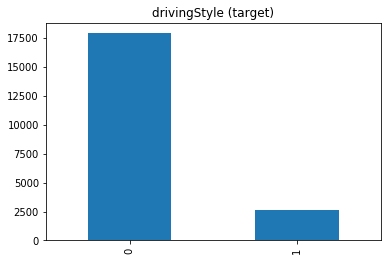

In [65]:
#Now work out the target counts for each class to get an understanding of the balancing that is needed
target_count =RelevantData.drivingStyle.value_counts()
print('EvenPaceStyle or Class 0:', target_count[0])
print('AgressivePaceStyle or Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='drivingStyle (target)');

In [66]:
#Define the output (to be classified)
y = RelevantData['drivingStyle']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: drivingStyle, dtype: int64

In [81]:
#Split the data set into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(RelevantData, y, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15386, 6)
(5129, 6)
(15386,)
(5129,)


In [82]:
aggressive_percent = y_test.mean()
even_percent = 1 - y_test.mean()
print(aggressive_percent)
print(even_percent)
#Shows what the accuracy would be if 'Even Driving' Style is predicted always. (Works out to be ~87% when all 4 data files are used, or 81% if just the two opel corsa files) => We need to design a classifer that provides better accuracy than this!

0.12692532657438096
0.8730746734256191


In [0]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [84]:
#Now perform KNN classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_curve, roc_auc_score
from scipy import interp
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
#Print the metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.8713199454084617
Precision:  0.49032258064516127
Recall:  0.35023041474654376
F1 Score:  0.35023041474654376
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4478
           1       0.49      0.35      0.41       651

    accuracy                           0.87      5129
   macro avg       0.70      0.65      0.67      5129
weighted avg       0.86      0.87      0.86      5129

Confusion Matrix: 
 [[4241  237]
 [ 423  228]]


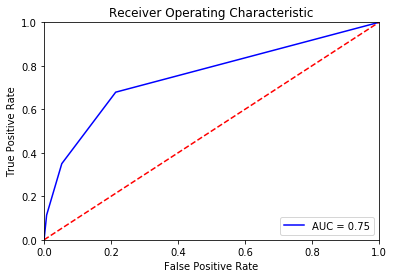

ROC ACU Score 0.753685023693236


In [85]:
#Plot the ROC curve
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics

probs = knn.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("ROC ACU Score", metrics.roc_auc_score(y_test, preds))

KNN shows much poorer results when no scaling and no balancing. Only slightly improved results when using all features vs 5 features. It seems balancing does have a positive impact, however when scaling applied the benefit of balancing is less.




In [86]:
#Try with Logistic Regression and SVM
modelsvm = svm.SVC(kernel ='linear',class_weight='balanced', tol=0.001, probability=True)
modelsvm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [87]:
y3_pred = modelsvm.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y3_pred))
print("Precision: ", metrics.precision_score(y_test, y3_pred))
print("Recall: ", metrics.recall_score(y_test, y3_pred))
print("F1 Score: ", metrics.recall_score(y_test, y3_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y3_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y3_pred))

Compare actual response with predicted (accuracy):  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4478
           1       1.00      1.00      1.00       651

    accuracy                           1.00      5129
   macro avg       1.00      1.00      1.00      5129
weighted avg       1.00      1.00      1.00      5129

Confusion Matrix: 
 [[4478    0]
 [   0  651]]


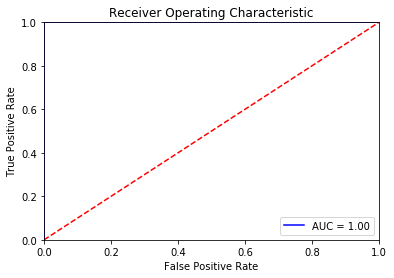

ROC ACU Score 1.0


In [88]:
#Draw ROC curve for SVM
probs = modelsvm.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("ROC ACU Score", metrics.roc_auc_score(y_test, preds))

In [89]:
#Logistic Regression
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
print("F1 Score: ", metrics.recall_score(y_test, y_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

Compare actual response with predicted (accuracy):  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4478
           1       1.00      1.00      1.00       651

    accuracy                           1.00      5129
   macro avg       1.00      1.00      1.00      5129
weighted avg       1.00      1.00      1.00      5129

Confusion Matrix: 
 [[4478    0]
 [   0  651]]


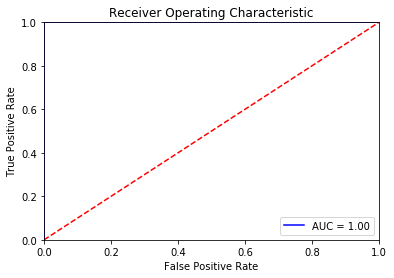

ROC ACU Score 1.0


In [90]:
#Draw ROC for Logistic Regression
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test,preds)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("ROC ACU Score", metrics.roc_auc_score(y_test, preds))

In [91]:
#For comparison, check performance if ALL features are used:
##First get the scaled version of the feature data
#alldata[allFeatureNames]= AllFeaturesScaled[allFeatureNames]

#Split the dataset
X_train, X_test, y_train, y_test = train_test_split(alldata, y, random_state = 1)

#Balancing using Random OverSampling

#ros = RandomOverSampler()
#X_ros, y_ros = ros.fit_sample(X_train, y_train)

#print(X_ros.shape[0] - alldata.shape[0], 'new random picked points')

#plot_2d_space(X_ros, y_ros, 'Random over-sampling')

#Now split using x_ros, y_ros
#X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state = 1)

#And classify
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y2_pred = knn.predict(X_test)
#Print the metrics
print("Compare actual response with predicted (accuracy): ", metrics.accuracy_score(y_test, y2_pred))
print("Precision: ", metrics.precision_score(y_test, y2_pred))
print("Recall: ", metrics.recall_score(y_test, y2_pred))
print("F1 Score: ", metrics.recall_score(y_test, y2_pred))
print("Classification Report: \n", metrics.classification_report(y_test, y2_pred))
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y2_pred))

Compare actual response with predicted (accuracy):  0.8742444921037239
Precision:  0.5066371681415929
Recall:  0.35176651305683565
F1 Score:  0.35176651305683565
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      4478
           1       0.51      0.35      0.42       651

    accuracy                           0.87      5129
   macro avg       0.71      0.65      0.67      5129
weighted avg       0.86      0.87      0.86      5129

Confusion Matrix: 
 [[4255  223]
 [ 422  229]]
